In [1]:
!pip  install spotipy
import spotipy # Removed extra space before this line
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd

# ... (rest of the code remains unchanged)
# Storing the credentials
client_id = '88553f6688c549918033063b4a2b727d'
client_secret = '565a5f209bd14057841e6ef03f17fb34'

# Initializing Spotify client
sp = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

# Search for popular pop songs
results = sp.search(q='genre:pop', limit=50, type='track', market='US')

# Extract relevant information
popular_tracks = []
for track in results['tracks']['items']:
    song_name = track['name']
    artist_name = track['artists'][0]['name']  # Main artist of the track
    album_name = track['album']['name']  # Album name
    popularity = track['popularity']  # Popularity score

    track_info = {
        "Song Name": song_name,
        "Artist Name": artist_name,
        "Album Name": album_name,
         "Popularity": popularity
    }
    popular_tracks.append(track_info)


  Obtaining dependency information for spotipy from https://files.pythonhosted.org/packages/ea/35/304e456a471128aa4a776243558f43aee3444731ef8fc9bc8c351fddfdd8/spotipy-2.24.0-py3-none-any.whl.metadata
  Obtaining dependency information for redis>=3.5.3 from https://files.pythonhosted.org/packages/c5/d1/19a9c76811757684a0f74adc25765c8a901d67f9f6472ac9d57c844a23c8/redis-5.0.8-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/255.6 kB ? eta -:--:--
   -------------------------------------- - 245.8/255.6 kB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 255.6/255.6 kB 7.9 MB/s eta 0:00:00


In [3]:
# Converting the data to a DataFrame
df_popular = pd.DataFrame(popular_tracks)

# Saving the data to a CSV file
df_popular.to_csv("popular_tracks.csv", index=False)

# Display the first few rows of the DataFrame
df_popular.head()


,Song Name,Artist Name,Album Name,Popularity
0,"Good Luck, Babe!",Chappell Roan,"Good Luck, Babe!",96
1,BIRDS OF A FEATHER,Billie Eilish,HIT ME HARD AND SOFT,99
2,I Had Some Help (Feat. Morgan Wallen),Post Malone,I Had Some Help,95
3,Please Please Please,Sabrina Carpenter,Please Please Please,98
4,Espresso,Sabrina Carpenter,Espresso,99


## EDA 



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data (assuming you've already created the DataFrame)
# df_popular = pd.DataFrame(popular_tracks)

In [5]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df_popular.head())

First few rows of the DataFrame:
                               Song Name        Artist Name  \
0                       Good Luck, Babe!      Chappell Roan   
1                     BIRDS OF A FEATHER      Billie Eilish   
2  I Had Some Help (Feat. Morgan Wallen)        Post Malone   
3                   Please Please Please  Sabrina Carpenter   
4                               Espresso  Sabrina Carpenter   

             Album Name  Popularity  
0      Good Luck, Babe!          96  
1  HIT ME HARD AND SOFT          99  
2       I Had Some Help          95  
3  Please Please Please          98  
4              Espresso          99  


In [16]:
print(df_popular.tail())

                                         Song Name Artist Name  \
45              Ric Flair Drip (with Metro Boomin)      Offset   
46  One Of The Girls (with JENNIE, Lily Rose Depp)  The Weeknd   
47                               Romantic Homicide        d4vd   
48                               Take Me to Church      Hozier   
49                                          greedy  Tate McRae   

                                           Album Name  Popularity  
45                                    Without Warning          85  
46  The Idol Episode 4 (Music from the HBO Origina...          92  
47                                  Romantic Homicide          86  
48                          Hozier (Expanded Edition)          80  
49                                             greedy          89  


In [20]:
df_popular.shape

(50, 4)

In [6]:
# Get basic information about the DataFrame
print("\nDataFrame Info:")
print(df_popular.info())



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Song Name    50 non-null     object
 1   Artist Name  50 non-null     object
 2   Album Name   50 non-null     object
 3   Popularity   50 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 1.7+ KB
None


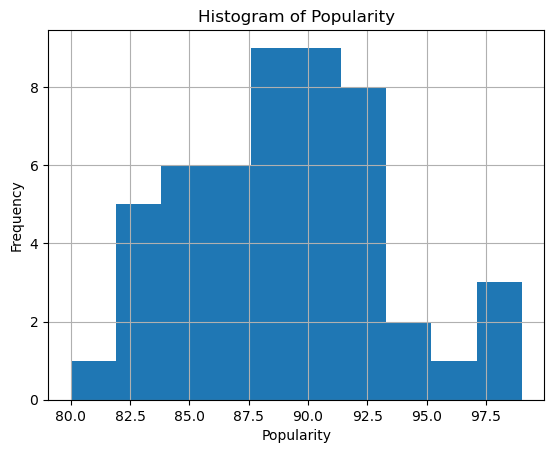

Skewness value:  0.2940437114399932
Kurtosis value:  -0.15363098397697206


In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_popular is your DataFrame
# Plotting the histogram (only relevant for numerical data)
# Replace "Numerical Column Name" with the actual column you want to plot
df_popular["Popularity"].hist()
plt.title("Histogram of Popularity")
plt.xlabel("Popularity")
plt.ylabel("Frequency")
plt.show()

# Checking skewness and kurtosis for numerical columns
# Replace "Numerical Column Name" with the actual column name
skewness_value = df_popular["Popularity"].skew()
kurtosis_value = df_popular["Popularity"].kurt()

print("Skewness value: ", skewness_value)
print("Kurtosis value: ", kurtosis_value)


Skewness value:  0.2940437114399932
Kurtosis value:  -0.15363098397697206


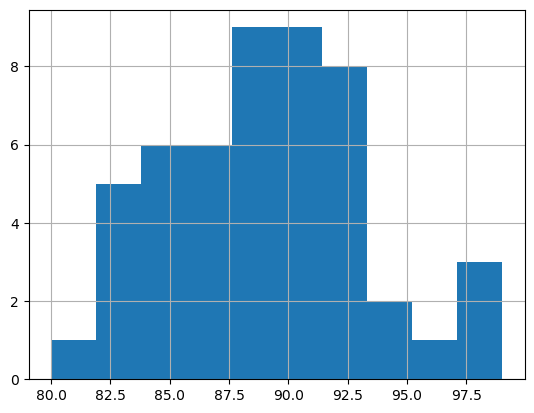

In [27]:
df_popular["Popularity"].hist()
print("Skewness value: ", df_popular["Popularity"].skew())
print("Kurtosis value: ", df_popular["Popularity"].kurt())


In [7]:
# Get summary statistics of numerical columns
print("\nSummary Statistics:")
print(df_popular.describe())


Summary Statistics:
       Popularity
count   50.000000
mean    89.060000
std      4.377167
min     80.000000
25%     86.000000
50%     89.000000
75%     92.000000
max     99.000000


In [8]:
# Check for missing values
print("\nMissing Values:")
print(df_popular.isnull().sum())


Missing Values:
Song Name      0
Artist Name    0
Album Name     0
Popularity     0
dtype: int64


In [9]:
# Check for duplicate rows
print("\nDuplicate Rows:")
print(df_popular.duplicated().sum())


Duplicate Rows:
0


In [10]:
# Check the distribution of categorical variables
categorical_columns = df_popular.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nValue Counts for {col}:")
    print(df_popular[col].value_counts())


Value Counts for Song Name:
Beautiful Things                                  2
A Bar Song (Tipsy)                                2
Too Sweet                                         2
Good Luck, Babe!                                  1
Miles On It                                       1
Fortnight (feat. Post Malone)                     1
Wind Up Missin’ You                               1
Guy For That (Feat. Luke Combs)                   1
Pour Me A Drink (Feat. Blake Shelton)             1
Nonsense                                          1
My Kink Is Karma                                  1
misses                                            1
Belong Together                                   1
Snooze                                            1
Femininomenon                                     1
Heartless (feat. Morgan Wallen)                   1
Shut up My Moms Calling                           1
you look like you love me (feat. Riley Green)     1
As It Was                          


Pairplot of Numerical Features:


C:\Users\swati\anaconda3\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


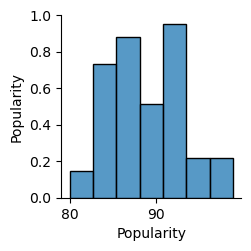

In [11]:
# Pairplot for numerical variables to check relationships
print("\nPairplot of Numerical Features:")
sns.pairplot(df_popular)
plt.show()


Correlation Heatmap:


C:\Users\swati\AppData\Local\Temp\ipykernel_13816\558525059.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_popular.corr(), annot=True, cmap='coolwarm', fmt='.2f')


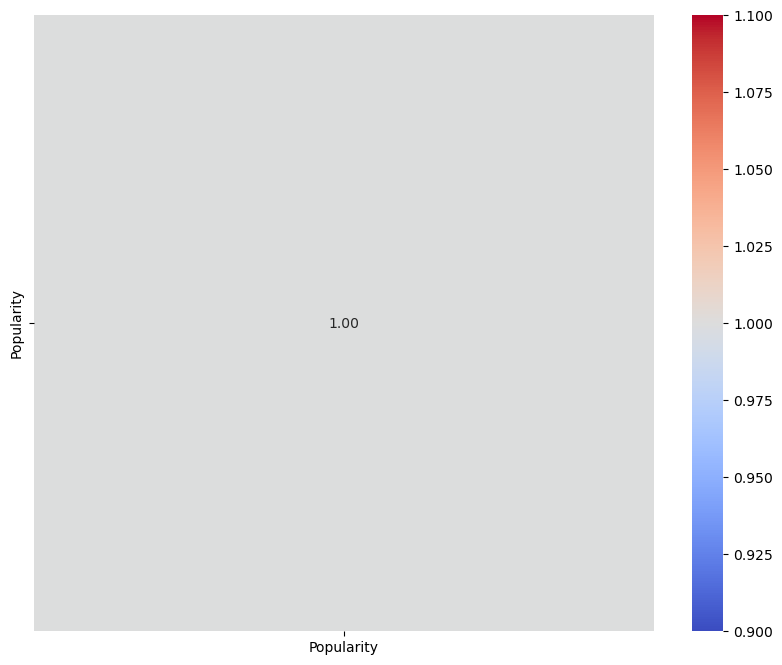

In [12]:
# Correlation heatmap for numerical features
print("\nCorrelation Heatmap:")
plt.figure(figsize=(10, 8))
sns.heatmap(df_popular.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

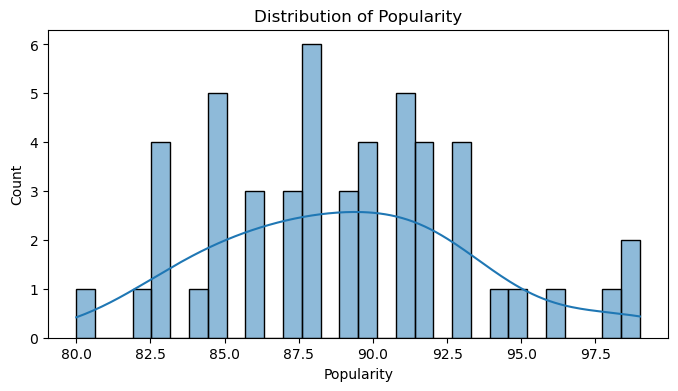

In [13]:
# Distribution plots for numerical variables
numerical_columns = df_popular.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_popular[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

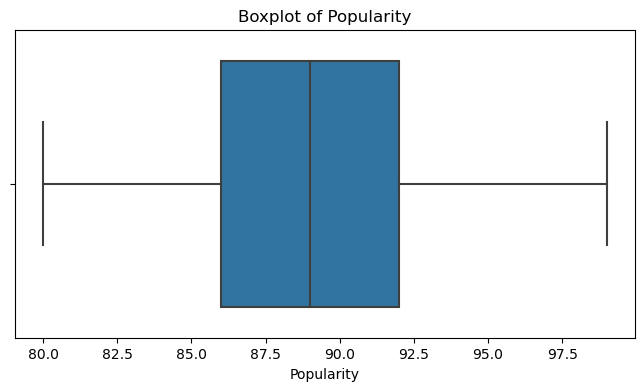

In [14]:
# Boxplots to check for outliers in numerical variables
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_popular[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

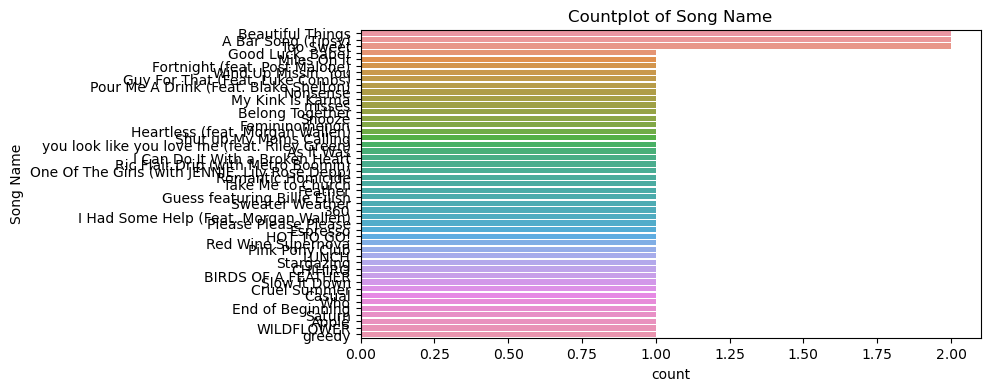

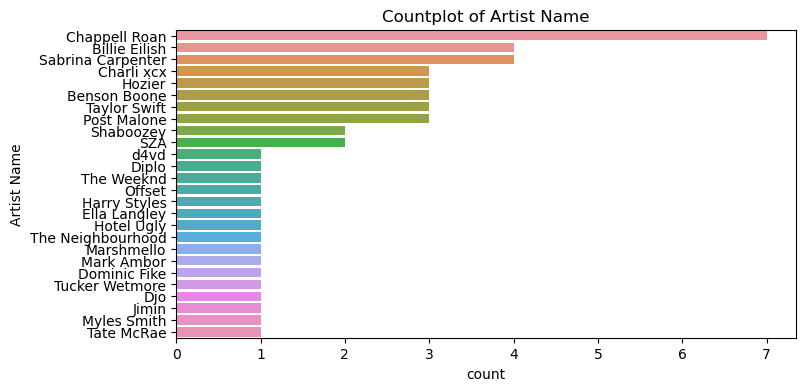

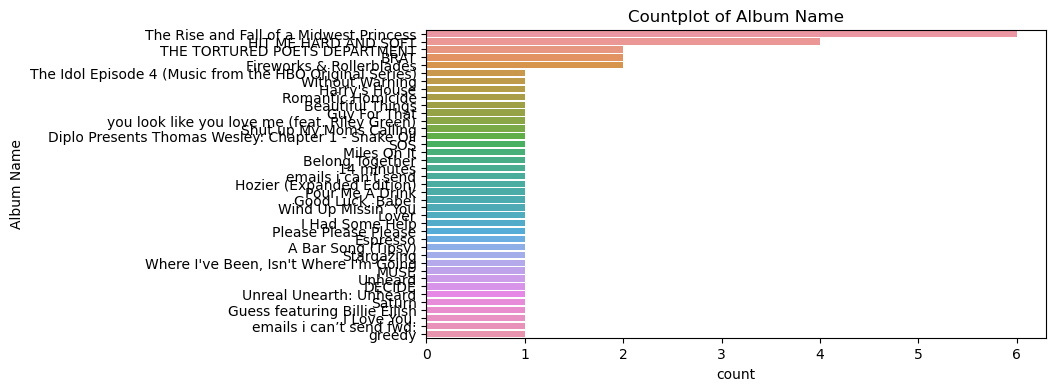

In [15]:
# Count plots for categorical variables
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=df_popular[col], order=df_popular[col].value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.show()